In [1]:
%load_ext autoreload
%autoreload 2
import os
import torch as t
from utils.config import opt
from model import FasterRCNNVGG16
from trainer import FasterRCNNTrainer
from data.util import  read_image
from utils.vis_tool import vis_bbox
from utils import array_tool as at
%matplotlib inline

/home/mahaviratcingularity/simple-faster-rcnn-pytorch-lablp/model/utils/nms/non_maximum_suppression.py:12: UserWarning: 
    the python code for non_maximum_suppression is about 2x slow
    It is strongly recommended to build cython code: 
    `cd model/utils/nms/; python3 build.py build_ext --inplace
  `cd model/utils/nms/; python3 build.py build_ext --inplace''')


In [16]:
img = read_image('misc/lp3.jpg')
img = t.from_numpy(img)[None]

In [11]:
faster_rcnn = FasterRCNNVGG16()
trainer = FasterRCNNTrainer(faster_rcnn).cuda()

In [14]:
LABEL_NAMES = (
    'A',
    'B',
    'C',
    'D',
    'E',
    'F',
    'G',
    'H',
    'I',
    'J',
    'K',
    'L',
    'M',
    'N',
    'O',
    'P',
    'Q',
    'R',
    'S',
    'T',
    'U',
    'V',
    'W',
    'X',
    'Y',
    'Z',
    '0',
    '1',
    '2',
    '3',
    '4',
    '5',
    '6',
    '7',
    '8',
    'LP',
    '9')

You'll need to download pretrained model from [google dirve](https://drive.google.com/open?id=1cQ27LIn-Rig4-Uayzy_gH5-cW-NRGVzY) 
# 1. model converted from chainer

A
B
B
M
2
3
3
6
LP
[array([ 0,  1,  1, 12, 28, 29, 29, 32, 35], dtype=int32)]
[array([0.2597645 , 0.98447293, 0.7835836 , 0.96308225, 0.92001677,
       0.92990357, 0.549121  , 0.98684967, 0.86833394], dtype=float32)]
[array([[ 836.78864, 1540.9945 ,  993.7287 , 1635.2169 ],
       [1050.6434 , 1457.8108 , 1226.2955 , 1563.4534 ],
       [1013.8058 , 1399.8694 , 1212.254  , 1512.7703 ],
       [1026.4526 , 1271.871  , 1215.1995 , 1430.1212 ],
       [1010.25586, 1601.5006 , 1228.3755 , 1717.4596 ],
       [1013.42523, 1688.5182 , 1213.8296 , 1795.3834 ],
       [ 984.7991 , 1774.0957 , 1167.5293 , 1869.7146 ],
       [ 992.6664 , 1843.1709 , 1159.4926 , 1933.6301 ],
       [ 775.32   , 1022.4433 , 1236.7988 , 2182.8792 ]], dtype=float32)]


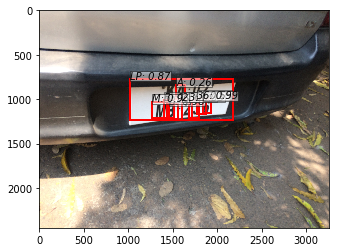

In [17]:
# in this machine the cupy isn't install correctly... 
# so it's a little slow
import numpy
#trainer.load('/home/mahaviratcingularity/chainer_best_model_converted_to_pytorch_0.7053.pth')
trainer.load('/home/mahaviratcingularity/simple-faster-rcnn-pytorch-lablp/models/fasterrcnn_withlp.pth')
opt.caffe_pretrain=False # this model was trained from caffe-pretrained model




_bboxes, _labels, _scores = trainer.faster_rcnn.predict(img,visualize=True)


X = numpy.array(_labels)

#print (X[0,1])
i=0
for i in range (X.shape[1]):
    #print (X[0,i])
    print (LABEL_NAMES[X[0,i]])


vis_bbox(at.tonumpy(img[0]),
         at.tonumpy(_bboxes[0]),
         at.tonumpy(_labels[0]).reshape(-1),
         at.tonumpy(_scores[0]).reshape(-1))
print ( _labels)
print  (_scores)
print (_bboxes)
# it failed to find the dog, but if you set threshold from 0.7 to 0.6, you'll find it

# 2. model trained with torchvision pretrained model

In [ ]:
trainer.load('/home/cy/fasterrcnn_12211511_0.701052458187_torchvision_pretrain.pth')
opt.caffe_pretrain=False # this model was trained from torchvision-pretrained model
_bboxes, _labels, _scores = trainer.faster_rcnn.predict(img,visualize=True)
vis_bbox(at.tonumpy(img[0]),
         at.tonumpy(_bboxes[0]),
         at.tonumpy(_labels[0]).reshape(-1),
         at.tonumpy(_scores[0]).reshape(-1))
# it failed to find the dog, but if you set threshold from 0.7 to 0.6, you'll find it

# 3. model trained with caffe pretrained model

In [ ]:
trainer.load('/home/cy/fasterrcnn_12222105_0.712649824453_caffe_pretrain.pth')
opt.caffe_pretrain=True # this model was trained from caffe-pretrained model
_bboxes, _labels, _scores = trainer.faster_rcnn.predict(img,visualize=True)
vis_bbox(at.tonumpy(img[0]),
         at.tonumpy(_bboxes[0]),
         at.tonumpy(_labels[0]).reshape(-1),
         at.tonumpy(_scores[0]).reshape(-1))